In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hellbuoy/car-price-prediction")
print(r"C:\Users\user\Documents\Machine Learning", path)

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\user\Documents\Machine Learning C:\Users\Administrator\.cache\kagglehub\datasets\hellbuoy\car-price-prediction\versions\1


In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv(r'C:\Users\Administrator\Documents\DATA ANALYTICS-SCIENCE\CAR PRICE PREDICTION PROJECT\CarPrice_Assignment (1).csv')
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# Check for missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
# Drop rows where price is missing
df = df.dropna(subset=['price'])

In [9]:
#Fill mileage values for both columns
df.fillna(
    {
        'citympg': df['citympg'].mean(),
        'highwaympg': df['highwaympg'].mean()
    },
    inplace=True
)

# Check if any missing values remain
print(df[['citympg', 'highwaympg']].isnull().sum())

citympg       0
highwaympg    0
dtype: int64


In [10]:
#Drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
#Check Fuel type unique values
print(df['fueltype'].value_counts(dropna=False))

fueltype
gas       185
diesel     20
Name: count, dtype: int64


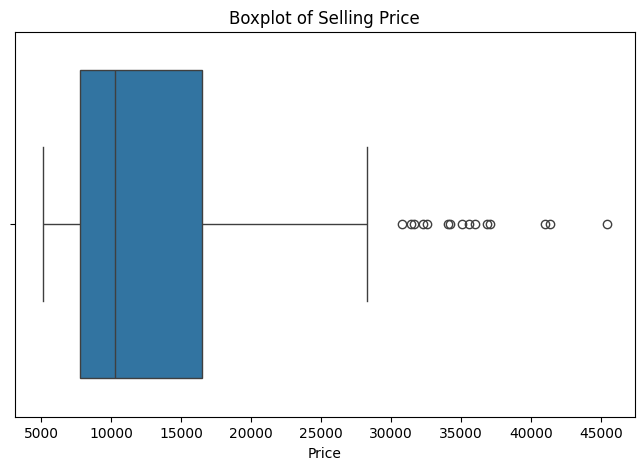

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for the selling price
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Selling Price')
plt.xlabel('Price')
plt.show()

In [13]:
# Remove extreme prices
df = df[(df['price'] >= 10000) & (df['price'] <= 5000000)]


In [14]:
# Clean column names
df.columns = (
    df.columns
    .str.strip()                     # Remove leading/trailing spaces
    .str.lower()                    # Make all lowercase
    .str.replace(' ', '_')          # Replace spaces with underscores
    .str.replace('[^a-z0-9_]', '',regex=True)  # Remove special characters
)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_id            105 non-null    int64  
 1   symboling         105 non-null    int64  
 2   carname           105 non-null    object 
 3   fueltype          105 non-null    object 
 4   aspiration        105 non-null    object 
 5   doornumber        105 non-null    object 
 6   carbody           105 non-null    object 
 7   drivewheel        105 non-null    object 
 8   enginelocation    105 non-null    object 
 9   wheelbase         105 non-null    float64
 10  carlength         105 non-null    float64
 11  carwidth          105 non-null    float64
 12  carheight         105 non-null    float64
 13  curbweight        105 non-null    int64  
 14  enginetype        105 non-null    object 
 15  cylindernumber    105 non-null    object 
 16  enginesize        105 non-null    int64  
 17  fu

In [15]:
string_cols = df.select_dtypes(include=['object']).columns
for col in string_cols:
    df[col] = pd.to_numeric(df[col], errors='ignore')
df.select_dtypes(include=['object']).columns


C:\Users\Administrator\AppData\Local\Temp\ipykernel_23128\1747577907.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


Index(['carname', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [16]:
# First, create an average mileage column from city and highway mpg
df['avgmpg'] = (df['citympg'] + df['highwaympg']) / 2

In [17]:
#CREATING A NEW COLUMN FOR PRICE PER KILOMETER
df['avg_kmpl'] = df['avgmpg'] * 1.60934 / 3.78541  # 1 mile = 1.60934 km, 1 gallon = 3.78541 liters
df['price_per_km'] = df['price'] / df['avg_kmpl']
df.head()


,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avgmpg,avg_kmpl,price_per_km
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,24.0,10.203428,1322.594665
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,24.0,10.203428,1617.103518
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,22.5,9.565714,1724.910419
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,27.0,11.478857,1215.277795
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,20.0,8.502857,2052.251373


In [18]:
df.reset_index()

,index,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avgmpg,avg_kmpl,price_per_km
0,0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,2.68,9.0,111,5000,21,27,13495.0,24.0,10.203428,1322.594665
1,1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,2.68,9.0,111,5000,21,27,16500.0,24.0,10.203428,1617.103518
2,2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,3.47,9.0,154,5000,19,26,16500.0,22.5,9.565714,1724.910419
3,3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,...,3.40,10.0,102,5500,24,30,13950.0,27.0,11.478857,1215.277795
4,4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,...,3.40,8.0,115,5500,18,22,17450.0,20.0,8.502857,2052.251373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,...,3.15,9.5,114,5400,23,28,16845.0,25.5,10.841143,1553.802995
101,201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,...,3.15,8.7,160,5300,19,25,19045.0,22.0,9.353143,2036.213983
102,202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,...,2.87,8.8,134,5500,18,23,21485.0,20.5,8.715428,2465.168538
103,203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,...,3.40,23.0,106,4800,26,27,22470.0,26.5,11.266286,1994.446163


In [19]:
df.to_csv('cleaned_car_price_data.csv', index=False )

In [20]:
average_price = df['price'].mean() #Average selling price
print(f"Average selling price: {average_price}")


Average selling price: 18565.85397142857


In [21]:
#Most common fuel type 
most_common_fuel = df['fueltype'].mode()[0]
count = df['fueltype'].value_counts()[most_common_fuel]
print(f"The most common fuel type is '{most_common_fuel}' with {count} cars.")


The most common fuel type is 'gas' with 91 cars.


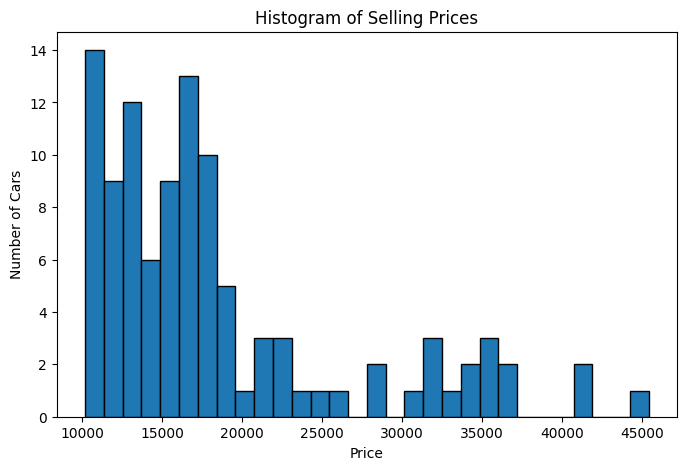

In [22]:
#Plotting a histogram for selling price
plt.figure(figsize=(8, 5))
plt.hist(df['price'], bins=30, edgecolor='black')
plt.title('Histogram of Selling Prices')
plt.xlabel('Price')
plt.ylabel('Number of Cars')
plt.show()

In [23]:
#Grouping cars by fuel type and find the average selling price for each group
avg_price_by_fuel = df.groupby('fueltype')['price'].mean().reset_index()
avg_price_by_fuel.columns = ['Fuel Type', 'Average Price']
avg_price_by_fuel['Average Price'] = avg_price_by_fuel['Average Price'].round(2)
print(avg_price_by_fuel)

  Fuel Type  Average Price
0    diesel       19193.79
1       gas       18469.25


In [24]:
# Show the highest average mileage
highest_avgmpg =  df['avgmpg'].max()
print(highest_avgmpg)

39.0


In [25]:
# Show the highest average mileage
highest_avgmpg =  df['avgmpg'].max()
print(highest_avgmpg)
# Correlation between avgmpg and price
correlation = df['avgmpg'].corr(df['price'])
print(f"Correlation between mileage and selling price: {correlation:.4f} higher mileage is associated with lower selling prices") ")

SyntaxError: unterminated string literal (detected at line 6) (3621896563.py, line 6)

In [ ]:
# Calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)

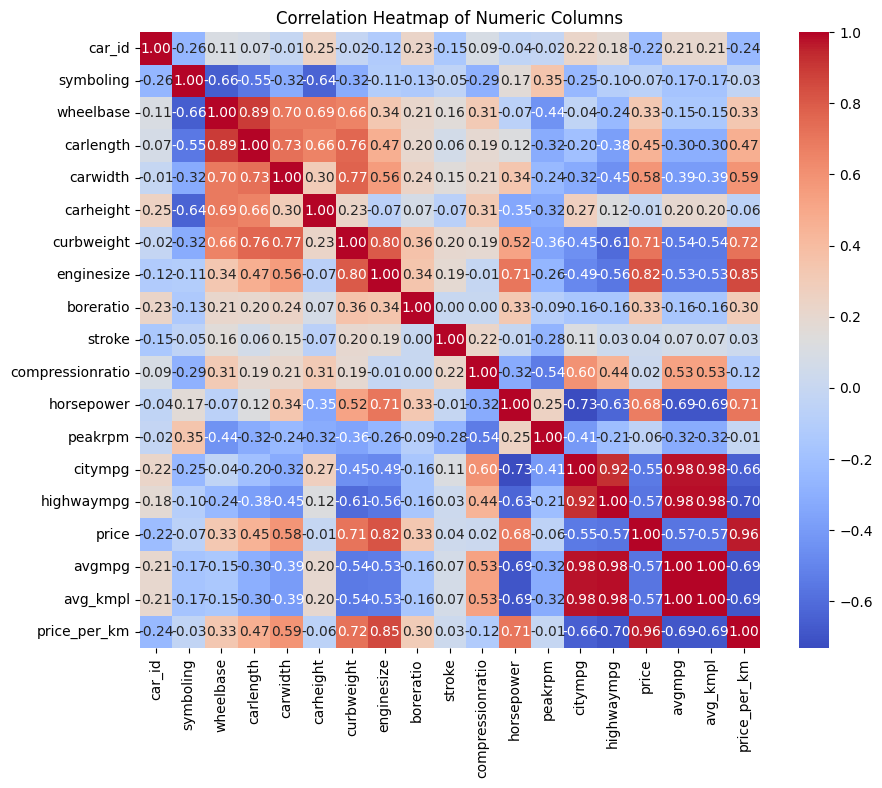

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [ ]:
#Find the most expensive car for each fuel type
idx = df.groupby('fueltype')['price'].idxmax()

# Select those rows
most_expensive_per_fuel = df.loc[idx, ['fueltype', 'carname', 'price']]

print(most_expensive_per_fuel)

   fueltype                          carname    price
70   diesel                    buick skyhawk  31600.0
74      gas  buick regal sport coupe (turbo)  45400.0


In [ ]:
# Extract brand (first word of carname)
df['brand'] = df['carname'].str.split(' ').str[0].str.lower()

In [ ]:
# Find the most frequent brand
most_common_brand = df['brand'].mode()[0]
count = df['brand'].value_counts()[most_common_brand]

print(f"The most common brand is '{most_common_brand}' with {count} cars.")

The most common brand is 'peugeot' with 11 cars.


In [ ]:
#MACHINE LEARNING QUESTIONS
# Correlation of numeric columns with price
correlations = df.corr(numeric_only=True)['price'].sort_values(ascending=False)
print(correlations)

price               1.000000
price_per_km        0.964559
enginesize          0.819635
curbweight          0.709607
horsepower          0.677695
carwidth            0.580656
carlength           0.446714
boreratio           0.331587
wheelbase           0.326255
stroke              0.035812
compressionratio    0.024977
carheight          -0.008984
peakrpm            -0.055646
symboling          -0.068365
car_id             -0.218506
citympg            -0.545532
highwaympg         -0.566738
avgmpg             -0.567680
avg_kmpl           -0.567680
Name: price, dtype: float64


In [ ]:
#Linear regression model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
if 'df' not in globals():
    raise NameError("DataFrame 'df' is not defined. Please run the previous cells to load and preprocess the data.")
X = df[['enginesize', 'curbweight', 'horsepower', 'wheelbase']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
print("R² score (train):", model.score(X_train, y_train))
print("R² score (test):", model.score(X_test, y_test))

Intercept: -16119.30026351714
Coefficients:
enginesize: 102.19845071603854
curbweight: 1.1007493240490982
horsepower: 54.413264398036375
wheelbase: 93.13522692009624
R² score (train): 0.7313277156041342
R² score (test): -0.400165715450318


In [27]:
#Apply Ridge regression on the dataset
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
if 'df' not in globals():
    raise NameError("DataFrame 'df' is not defined. Please run the previous cells to load and preprocess the data.")
X = df[['enginesize', 'curbweight', 'horsepower', 'wheelbase']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
print("Ridge Regression R² score (train):", ridge_model.score(X_train, y_train))
print("Ridge Regression R² score (test):", ridge_model.score(X_test, y_test))

Ridge Regression R² score (train): 0.7313277143372592
Ridge Regression R² score (test): -0.40023006817620077


In [ ]:
#Discuss why Ridge regression might perform better or worse in certain scenarios
#Ridge regression performs well when all features contribute to the outcome and there is high multicollinearity (highly correlated features). This model shrinks coefficients to reduce overfitting and hence stabilizes the model
#When the goal is feature selection- the model may perform worse, as all the features are kept and the model may struggle if the features are not correctly scaled


In [28]:
#Use cross validation to evaluate the rigde regression model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
if 'df' not in globals():
    raise NameError("DataFrame 'df' is not defined. Please run the previous cells to load and preprocess the data.")    
X = df[['enginesize', 'curbweight', 'horsepower', 'wheelbase']]
y = df['price']
ridge_model = Ridge(alpha=1.0)
cv_scores = cross_val_score(ridge_model, X, y, cv=5, scoring
='r2')
print("Cross-validated R² scores:", cv_scores)

Cross-validated R² scores: [ 0.58995376  0.7036087   0.46053591  0.53008735 -0.44582769]


In [ ]:
#Explain why cross validation gives a better estimate of model performance than a single train test split
#Cross-validation provides a more robust estimate of model performance by averaging results over multiple train-test splits. This reduces the variance associated with a single split, which may be unrepresentative due to random chance. It ensures that every data point is used for both training and testing, leading to a more comprehensive evaluation of the model's ability to generalize to unseen data
#Cross validation reduces bias and variance in performance estimates compared to a single train-test split
#It maximizes data utilization by using all data points for both training and validation across different folds

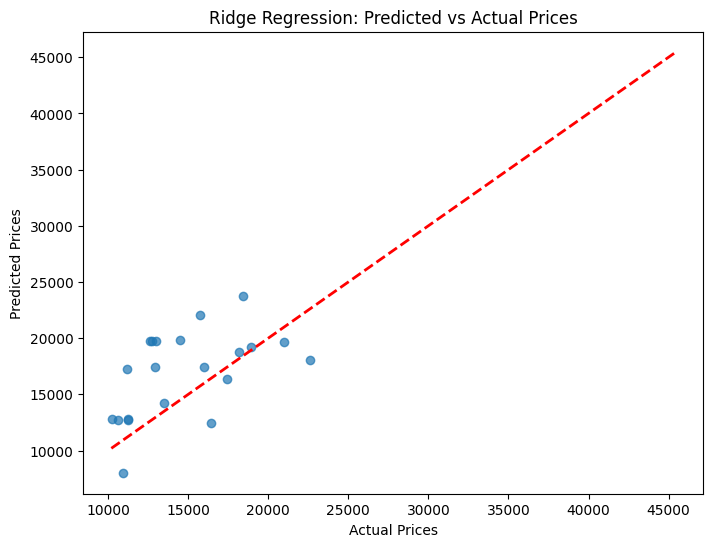

In [29]:
#Plot the predicted vs the actual prices for the best model-Ridge regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
if 'df' not in globals():
    raise NameError("DataFrame 'df' is not defined. Please run the previous cells to load and preprocess the data.")
X = df[['enginesize', 'curbweight', 'horsepower', 'wheelbase']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Ridge Regression: Predicted vs Actual Prices')
plt.show()

In [30]:
#Use gridsearchCV to findthe best alpha value for Ridge regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
if 'df' not in globals():
    raise NameError("DataFrame 'df' is not defined. Please run the previous cells to load and preprocess the data.")
X = df[['enginesize', 'curbweight', 'horsepower', 'wheelbase']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, random_state=42)
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best alpha:", grid_search.best_params_['alpha'])

Best alpha: 100


In [31]:
#30.Trying polynomial regression on the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
if 'df' not in globals():
    raise NameError("DataFrame 'df' is not defined. Please run the previous cells to load and preprocess the data.")
X = df[['enginesize', 'curbweight', 'horsepower', 'wheelbase']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
poly_model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1.0
))
poly_model.fit(X_train, y_train)
print("Polynomial Ridge Regression R² score (train):", poly_model.score(X_train, y_train))

Polynomial Ridge Regression R² score (train): 0.7798480335645515


In [ ]:
#Summary of findings
#Ridge regression performed best because it effectively handled multicollinearity among features and reduced overfitting through regularization. The cross-validation results confirmed its robustness across different data splits. Polynomial regression showed some improvement in capturing non-linear relationships, but the increase in complexity did not significantly enhance performance compared to Ridge regression. Overall, Ridge regression provided a good balance between bias and variance, making it the most suitable model for predicting car prices in this dataset.
#To improve the prediction further, I would explore more advanced features like performing hyperparameter tuning and standardizing the features before fitting